Importing Libraries

In [209]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
df=pd.read_csv(r"C:\Users\DSCKK2\OneDrive - CELANESE CORPORATION\Python\EXCEL\new_insurance_data.csv")

In [172]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [173]:
df.shape

(1338, 13)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [175]:
df.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [176]:
round(df.isnull().sum()/len(df)*100,2)

age                                0.67
sex                                0.00
bmi                                0.22
children                           0.37
smoker                             0.00
Claim_Amount                       1.05
past_consultations                 0.45
num_of_steps                       0.22
Hospital_expenditure               0.30
NUmber_of_past_hospitalizations    0.15
Anual_Salary                       0.45
region                             0.00
charges                            0.00
dtype: float64

removing Null values from data

In [177]:
df.dropna(inplace=True)

In [178]:
df.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

sns.boxplot(data=df,x='age')

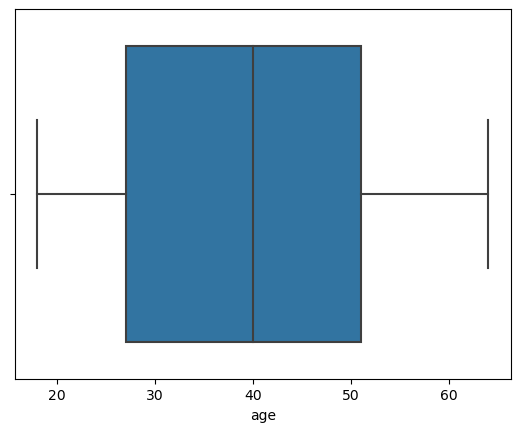

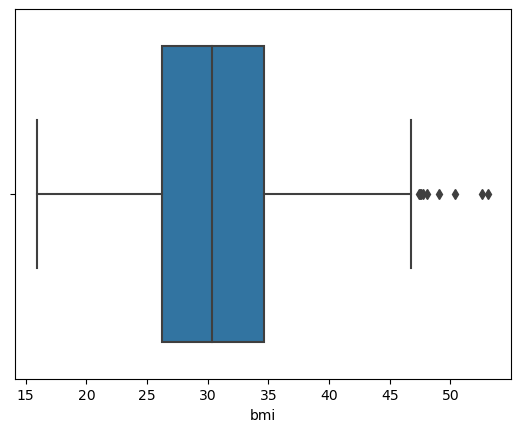

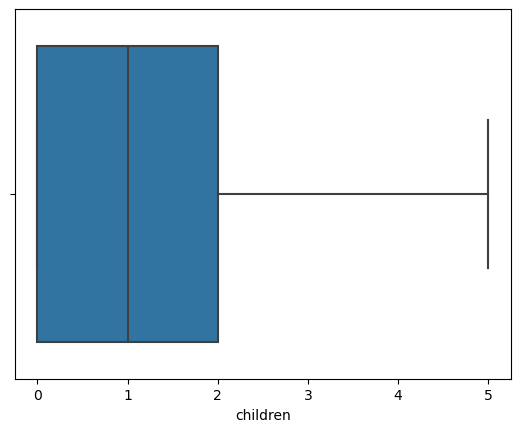

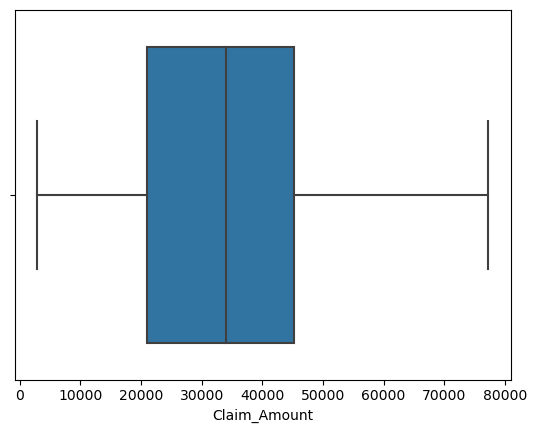

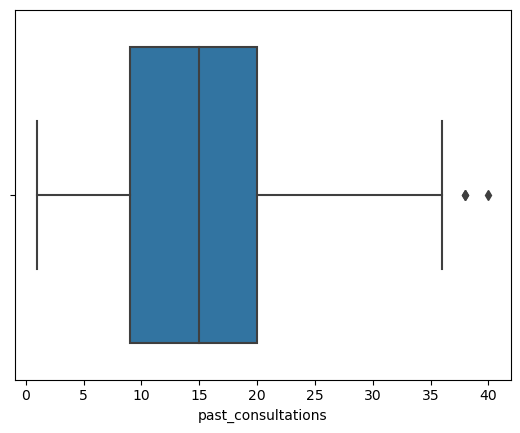

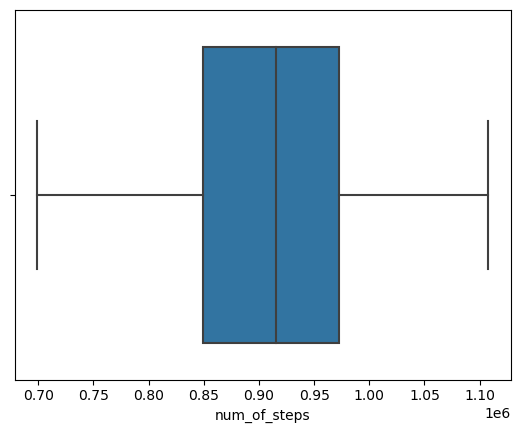

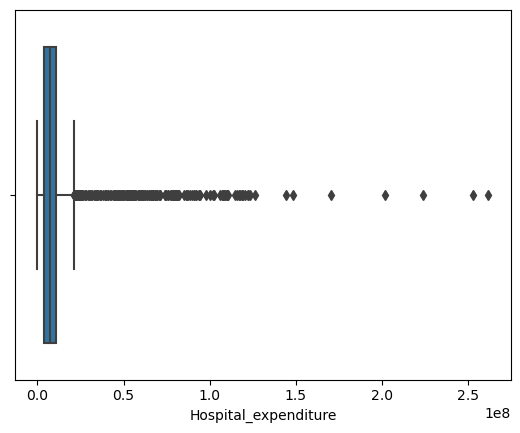

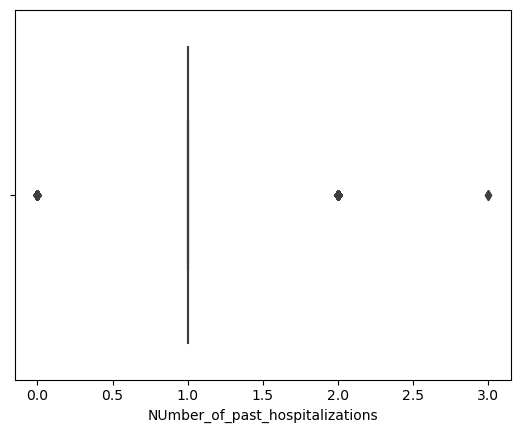

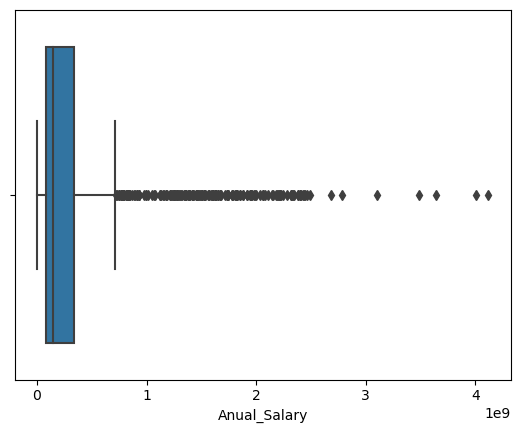

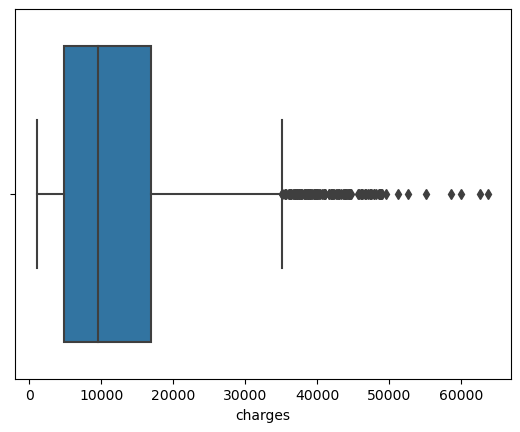

In [179]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(data=df,x=i)
        plt.show()
 

In [180]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [181]:
out_list=['bmi', 'past_consultations','Hospital_expenditure', 'Anual_Salary',  'charges']

In [182]:
for col in out_list:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    
    IQR=Q3-Q1
    
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    
    df=df[(df[col]>LL)&(df[col]<UL)]

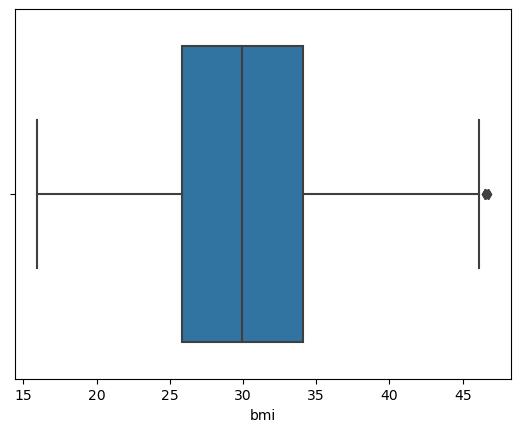

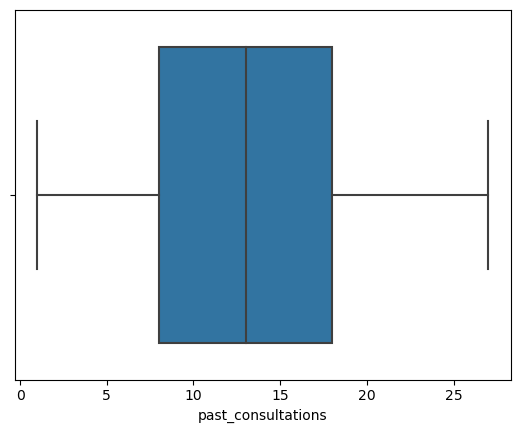

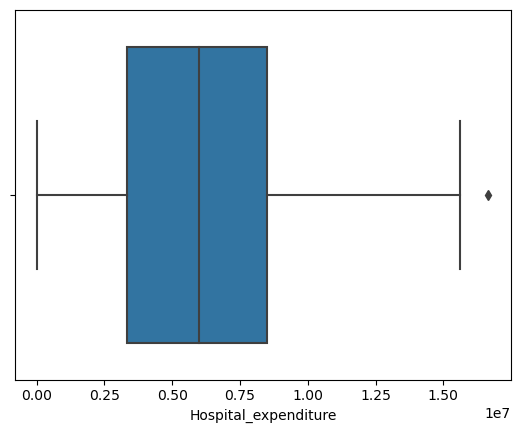

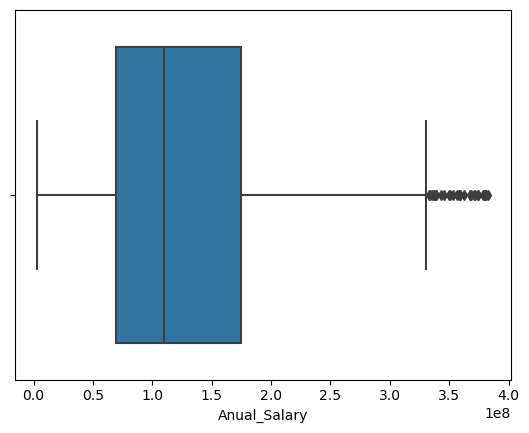

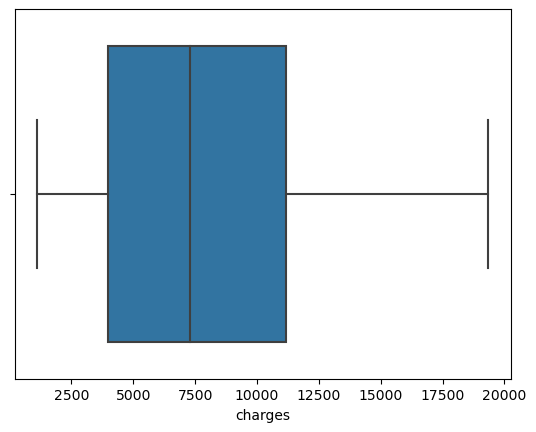

In [183]:
for col in out_list:
    sns.boxplot(data=df,x=col)
    plt.show()


In [184]:
df.corr(numeric_only=True)

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
age,1.000000,0.157363,0.046903,0.106907,0.178307,0.763756,0.161881,0.527364,0.508866,0.682315
bmi,0.157363,1.000000,0.012556,0.013019,0.017543,0.043881,0.013951,0.022507,0.007997,0.019630
children,0.046903,0.012556,1.000000,0.037777,0.043747,0.219064,-0.008496,0.309678,0.066027,0.131216
Claim_Amount,0.106907,0.013019,0.037777,1.000000,0.070665,0.187298,0.050630,0.108704,0.169931,0.194932
past_consultations,0.178307,0.017543,0.043747,0.070665,1.000000,0.265269,0.088732,0.135027,0.273144,0.286770
num_of_steps,0.763756,0.043881,0.219064,0.187298,0.265269,1.000000,0.309669,0.715836,0.794464,0.942969
Hospital_expenditure,0.161881,0.013951,-0.008496,0.050630,0.088732,0.309669,1.000000,0.131773,0.378125,0.366163
NUmber_of_past_hospitalizations,0.527364,0.022507,0.309678,0.108704,0.135027,0.715836,0.131773,1.000000,0.373849,0.532328
Anual_Salary,0.508866,0.007997,0.066027,0.169931,0.273144,0.794464,0.378125,0.373849,1.000000,0.908877
charges,0.682315,0.019630,0.131216,0.194932,0.286770,0.942969,0.366163,0.532328,0.908877,1.000000


<Axes: >

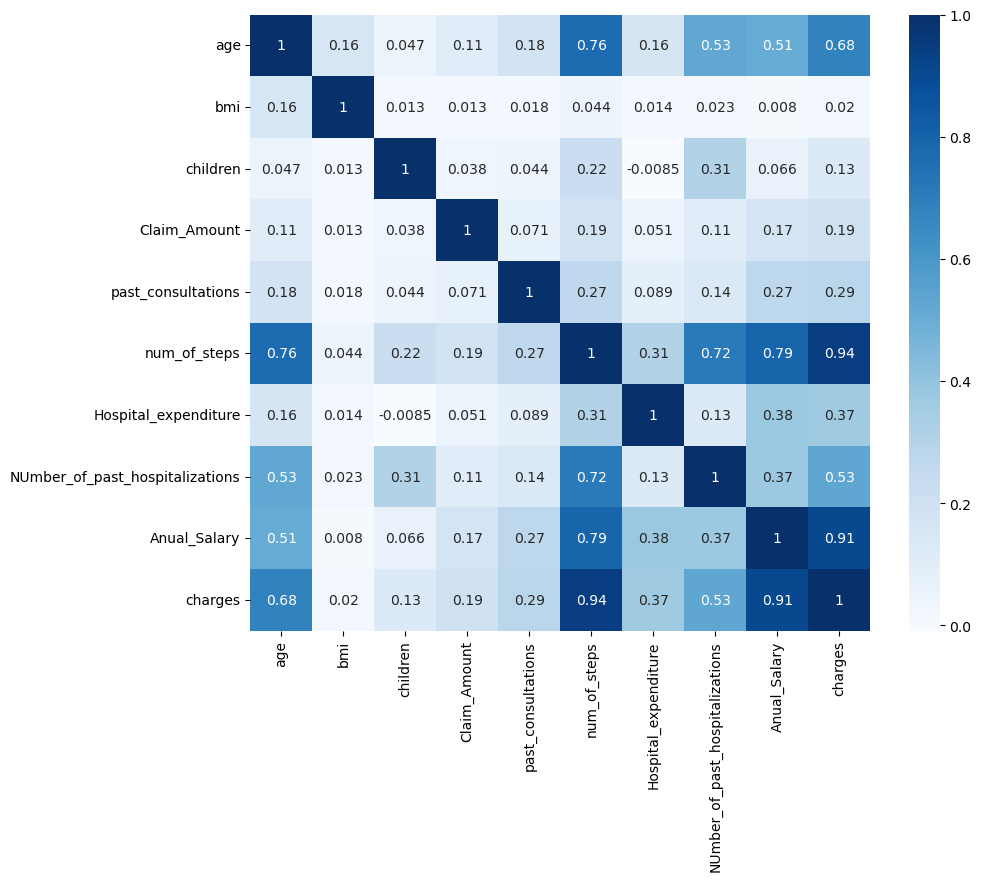

In [185]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues')

In [186]:
df.drop('num_of_steps',axis=1,inplace=True)

<Axes: >

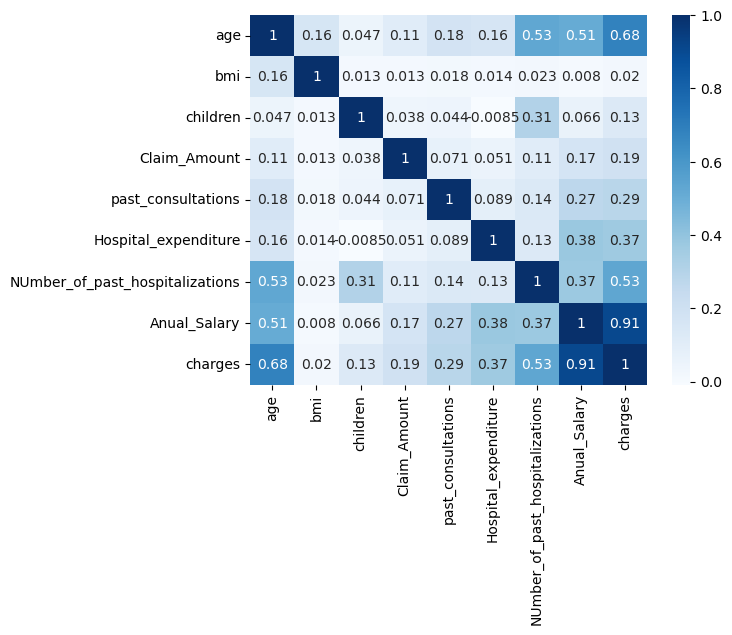

In [187]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues')

Label encoding

In [188]:
df['sex']=df['sex'].map({'male':0,'female':1})


In [191]:
df['region'].unique()

array([0, 1, 2, 3], dtype=int64)

In [190]:
df['smoker']=df['smoker'].map({'yes':0,'no':1})
df['region']=df['region'].map({'southeast':0,'southwest':1,'northwest':2,'northeast':3})

Model building

In [192]:
x=df.drop('charges',axis=1)

In [193]:
y=df['charges']

In [194]:
from sklearn.model_selection import train_test_split

In [195]:
x_train,x_test,y_train,y_test=train_test_split(x,y ,train_size=0.75,random_state=100)

In [196]:
from sklearn.linear_model import LinearRegression

In [197]:
Le=LinearRegression()

In [198]:
Le.fit(x_train,y_train)

LinearRegression()

In [201]:
pred=Le.predict(x_test)

In [202]:
pred

array([19774.30078063,  9265.12451655,  6337.52291331,  9560.76181805,
       14041.3711169 ,  5235.08541094,  5781.66644415, 10913.79943105,
        5319.82250665,  4807.58320084,  7849.24642561,  8405.71547994,
        7624.86869156,  5119.97822844,   753.04487487,  4407.3499929 ,
       12486.05959483,  5185.37512473,  1711.39766962,  1341.81882401,
        9275.79607445,  9720.17286648,  4168.95299124,  1907.45355779,
        8976.37233811,  7733.45168848, 10214.95672587,  4748.46220089,
        8940.81060969, 20723.03745281,  6662.90430167,  3967.71901684,
        4912.17777444,  4842.32140425,  9175.37972505,  6549.41618819,
       11414.80676179,  8734.59482165, 12743.24469251, 13312.47344858,
        9402.74412425,  6786.29962606,  8821.08836369,   777.04677512,
        6500.99386555, 17233.19418277, 13609.56869677,  1063.08606729,
        4197.47960284,  4446.39145865, 10667.20933914,  5817.957024  ,
        4855.43745627,  8125.5016789 ,  5527.90392   ,  2127.6654352 ,
      

In [203]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.9332264383226846